In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [63]:
x=np.linspace(0.1,9,20)

In [64]:
y=5+10*x-9.5*x**2+x**3

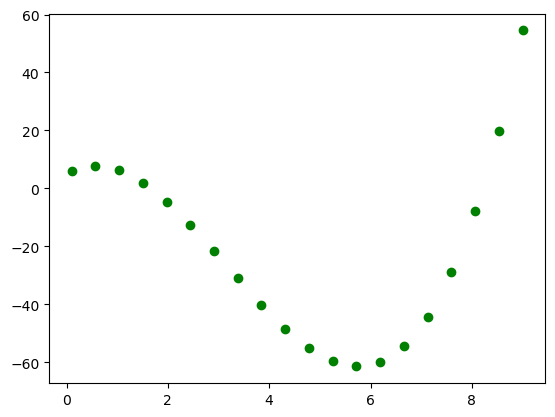

In [65]:
plt.plot(x,y,'go')

In [66]:
X=np.array([x**i for i in range(4)]).T

In [67]:
W=np.linalg.pinv(X.T@X)@X.T@y

In [68]:
W

array([ 5. , 10. , -9.5,  1. ])

In [69]:
f=lambda x,a,b,c,d: a+b*x+c*x**2+d*x**3

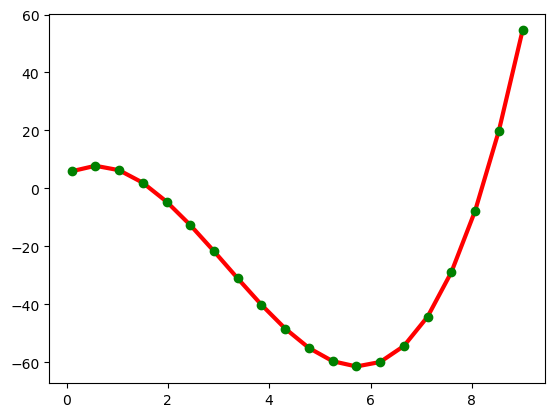

In [70]:
plt.plot(x,f(x,*W),'r-',lw=3)
plt.plot(x,y,'go')

In [71]:
def loss(yp,y):
    J=(yp-y).T@(yp-y)
    return J

In [72]:
def grad(x,y,w):   # x in hyper plane
    dw=x.T@x@w-x.T@y
    return dw

In [84]:
def train(x,y,epochs=500000,lr=1e-7):
    loss_history=np.zeros(epochs)
    X=np.array([x**i for i in range(4)]).T
    W=np.random.randn(len(X[0]))
    for i in range(epochs):
        W=W-lr*grad(X,y,W)   # W-=lr*grad(X,y,W)
        yp=X@W
        loss_history[i]=loss(yp,y)
        if (i+1)%25000==0:
            plt.plot(x,y,'go')
            plt.plot(x,X@W,'r-',lw=3)
            plt.show()
    return loss_history

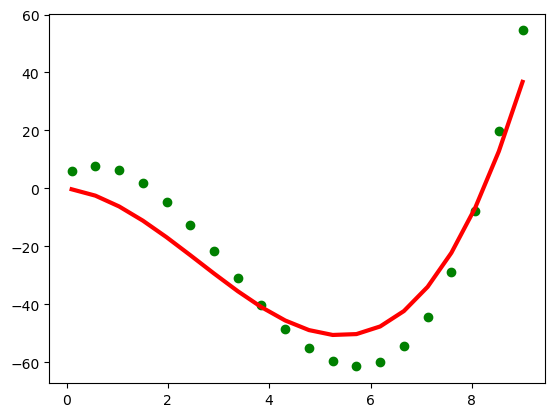

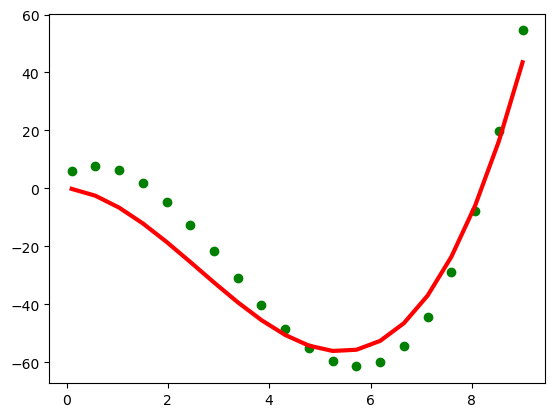

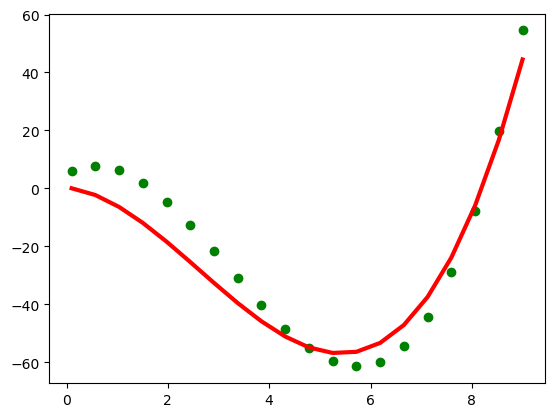

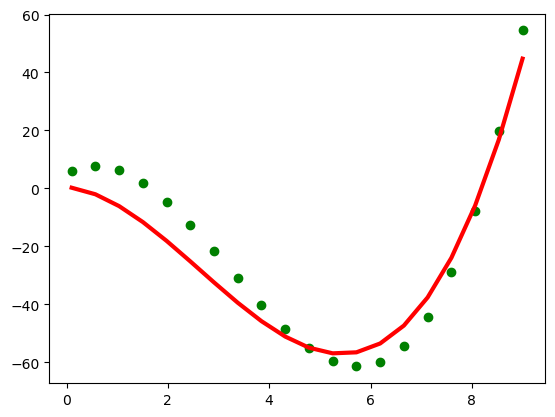

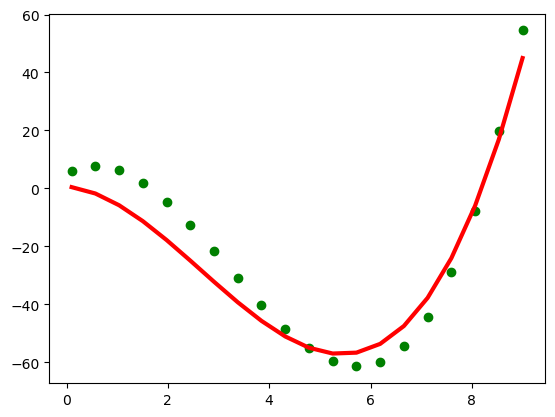

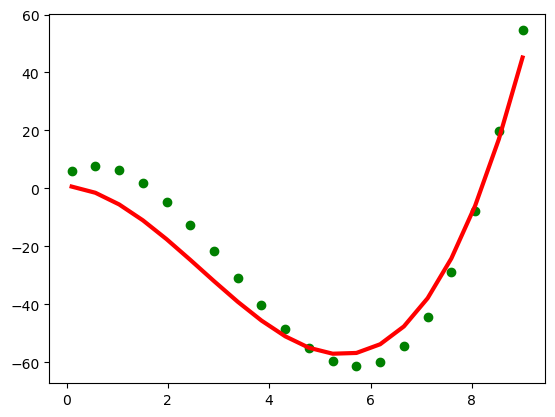

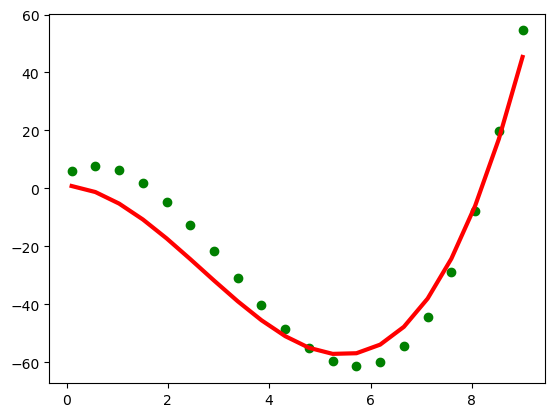

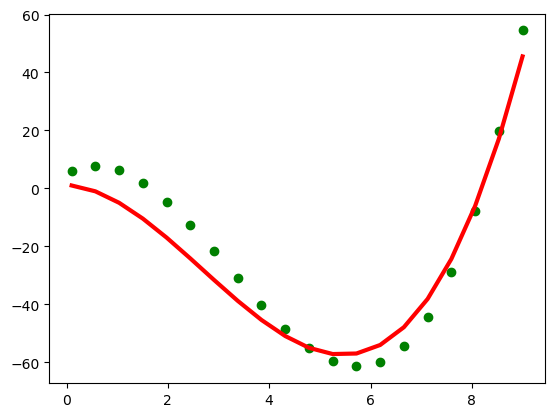

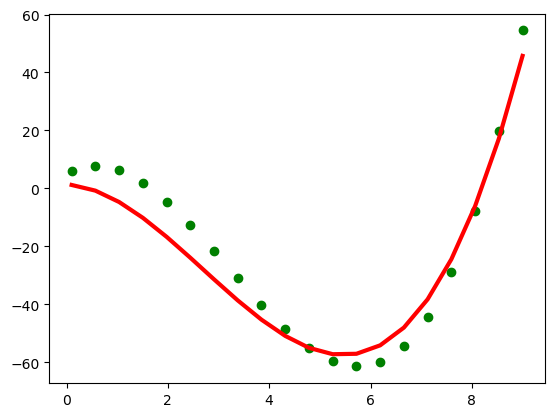

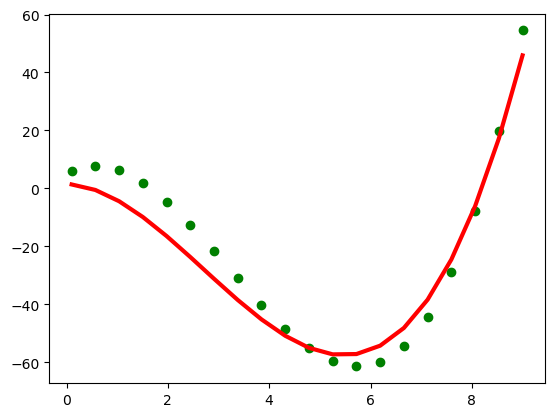

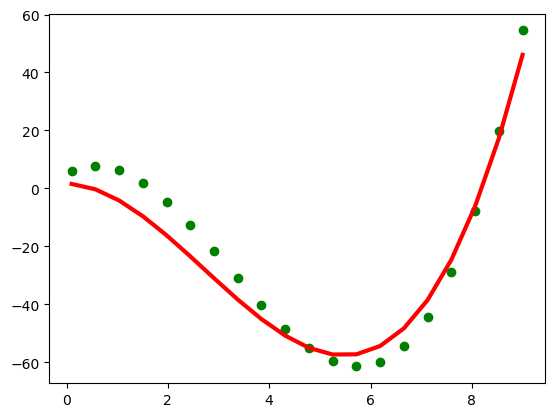

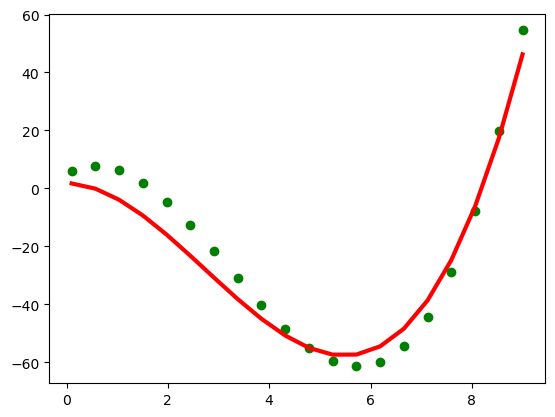

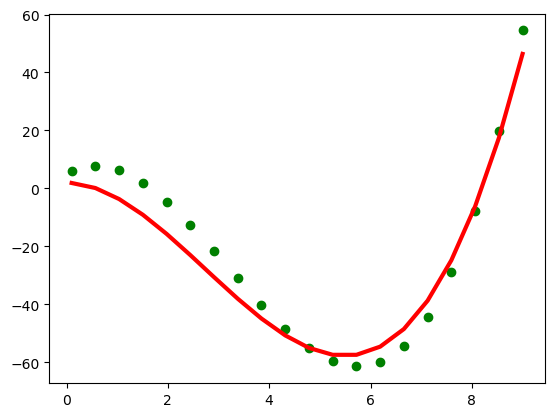

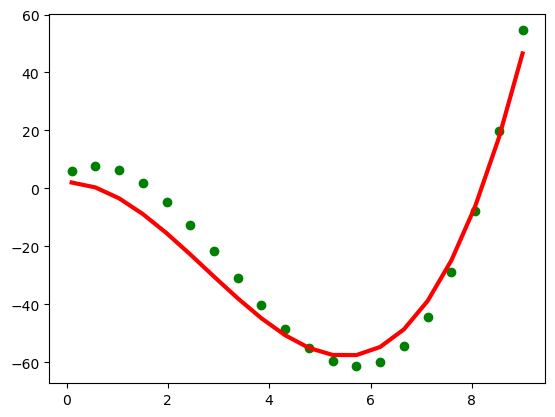

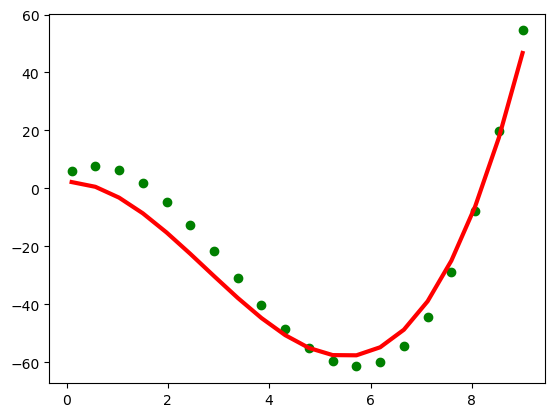

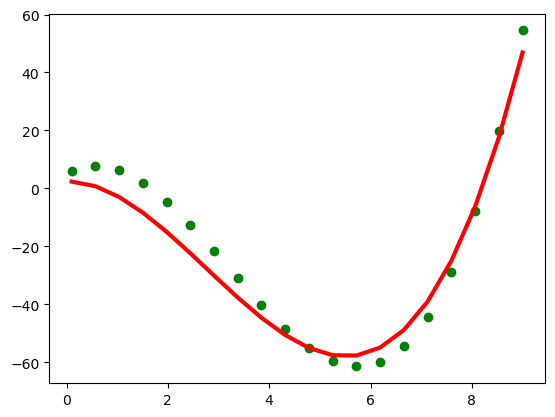

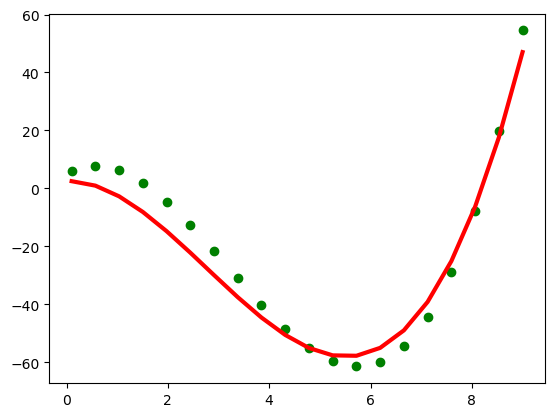

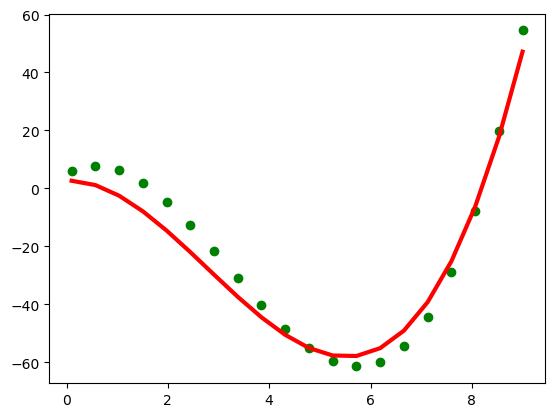

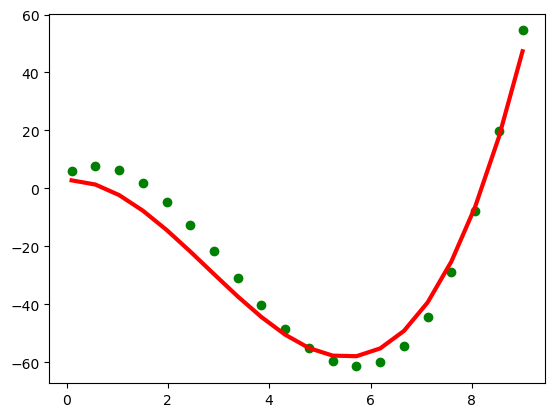

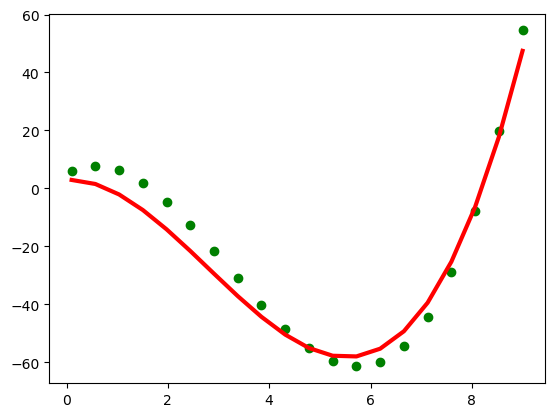

In [85]:
history=train(x,y)